### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import root_mean_squared_error, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Query dataset

In [2]:
bank_loan_data = pd.read_csv('bank_loan_approval_dataset.csv')
bank_loan_data.shape

(10000, 16)

### Read dataset

In [3]:
bank_loan_data.head()

,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Has_CreditCard,LoanAmount,Loan_Amount_Term,Owns_Car,Owns_House,Property_Area,Loan_Status
0,LN0001,Customer_0101,Other,Yes,2,Graduate,No,59779,46697,Yes,403,300,Unknown,0,Semiurban,N
1,LN0002,Customer_0102,Male,No,1,Graduate,No,38662,41547,Yes,299,120,Yes,0,Semiurban,N
2,LN0003,Customer_0103,Other,No,0,Graduate,No,39185,17924,Yes,428,240,Unknown,1,Urban,N
3,LN0004,Customer_0104,Other,No,2,Graduate,No,10810,41753,Yes,194,180,Yes,0,Semiurban,N
4,LN0005,Customer_0105,Male,Yes,3,Not Graduate,No,54042,28492,Yes,674,120,Yes,1,Rural,Y


In [4]:
bank_loan_data.tail()

,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Has_CreditCard,LoanAmount,Loan_Amount_Term,Owns_Car,Owns_House,Property_Area,Loan_Status
9995,LN9996,Customer_10096,Other,No,0,Not Graduate,No,20770,14295,Yes,362,60,Unknown,0,Semiurban,N
9996,LN9997,Customer_10097,Male,No,0,Graduate,No,56944,13737,Yes,253,180,Unknown,1,Urban,Y
9997,LN9998,Customer_10098,Female,Yes,3,Graduate,Yes,20581,10853,Yes,271,180,Unknown,1,Rural,Y
9998,LN9999,Customer_10099,Female,Yes,0,Graduate,No,21669,42926,Yes,81,180,Unknown,1,Urban,N
9999,LN10000,Customer_10100,Other,No,2,Not Graduate,Yes,22343,26927,Yes,686,60,Unknown,0,Urban,N


### Data preprocessing

#### Split dataset into numerical and categorical

In [5]:
cat_data = bank_loan_data.select_dtypes('object')
cat_data

,Loan_ID,Applicant_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Has_CreditCard,Owns_Car,Property_Area,Loan_Status
0,LN0001,Customer_0101,Other,Yes,Graduate,No,59779,46697,Yes,Unknown,Semiurban,N
1,LN0002,Customer_0102,Male,No,Graduate,No,38662,41547,Yes,Yes,Semiurban,N
2,LN0003,Customer_0103,Other,No,Graduate,No,39185,17924,Yes,Unknown,Urban,N
3,LN0004,Customer_0104,Other,No,Graduate,No,10810,41753,Yes,Yes,Semiurban,N
4,LN0005,Customer_0105,Male,Yes,Not Graduate,No,54042,28492,Yes,Yes,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LN9996,Customer_10096,Other,No,Not Graduate,No,20770,14295,Yes,Unknown,Semiurban,N
9996,LN9997,Customer_10097,Male,No,Graduate,No,56944,13737,Yes,Unknown,Urban,Y
9997,LN9998,Customer_10098,Female,Yes,Graduate,Yes,20581,10853,Yes,Unknown,Rural,Y
9998,LN9999,Customer_10099,Female,Yes,Graduate,No,21669,42926,Yes,Unknown,Urban,N


In [6]:
num_data = bank_loan_data.select_dtypes('number')
num_data

,Dependents,LoanAmount,Loan_Amount_Term,Owns_House
0,2,403,300,0
1,1,299,120,0
2,0,428,240,1
3,2,194,180,0
4,3,674,120,1
...,...,...,...,...
9995,0,362,60,0
9996,0,253,180,1
9997,3,271,180,1
9998,0,81,180,1


#### Deal with inconsistencies for categorical data

In [7]:
print(cat_data['ApplicantIncome'].unique())

print("\nApplicantIncome should be a numeric data type")

# Convert strings to numeric data types

num_data['ApplicantIncome'] = pd.to_numeric(cat_data['ApplicantIncome'], errors = 'coerce')
num_data['ApplicantIncome']

['59779' '38662' '39185' ... '20581' '21669' '22343']

ApplicantIncome should be a numeric data type


0       59779.0
1       38662.0
2       39185.0
3       10810.0
4       54042.0
         ...   
9995    20770.0
9996    56944.0
9997    20581.0
9998    21669.0
9999    22343.0
Name: ApplicantIncome, Length: 10000, dtype: float64

In [8]:
print(cat_data['CoapplicantIncome'].unique())

print("\nCoapplicantIncome should be a numeric data type")

# Convert strings to numeric data types

num_data['CoapplicantIncome'] = pd.to_numeric(cat_data['CoapplicantIncome'], errors = 'coerce')
num_data['CoapplicantIncome']

['46697' '41547' '17924' ... '10853' '42926' '26927']

CoapplicantIncome should be a numeric data type


0       46697.0
1       41547.0
2       17924.0
3       41753.0
4       28492.0
         ...   
9995    14295.0
9996    13737.0
9997    10853.0
9998    42926.0
9999    26927.0
Name: CoapplicantIncome, Length: 10000, dtype: float64

#### Deal with unnecessary columns for categorical data

In [9]:
# drop these columns 'Loan_ID' and 'Applicant_ID'

cat_data.drop(columns = ['Loan_ID', 'Applicant_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis = 1, inplace = True)
cat_data

,Gender,Married,Education,Self_Employed,Has_CreditCard,Owns_Car,Property_Area,Loan_Status
0,Other,Yes,Graduate,No,Yes,Unknown,Semiurban,N
1,Male,No,Graduate,No,Yes,Yes,Semiurban,N
2,Other,No,Graduate,No,Yes,Unknown,Urban,N
3,Other,No,Graduate,No,Yes,Yes,Semiurban,N
4,Male,Yes,Not Graduate,No,Yes,Yes,Rural,Y
...,...,...,...,...,...,...,...,...
9995,Other,No,Not Graduate,No,Yes,Unknown,Semiurban,N
9996,Male,No,Graduate,No,Yes,Unknown,Urban,Y
9997,Female,Yes,Graduate,Yes,Yes,Unknown,Rural,Y
9998,Female,Yes,Graduate,No,Yes,Unknown,Urban,N


#### Deal with missing values for categorical data

In [10]:
# Confirm whether categorical data contains missing values

print(cat_data.isna().sum())

print("\nCategorical data contains no missing values")

Gender            0
Married           0
Education         0
Self_Employed     0
Has_CreditCard    0
Owns_Car          0
Property_Area     0
Loan_Status       0
dtype: int64

Categorical data contains no missing values


#### Deal with duplicated values for categorical data

In [11]:
# Confirm whether there are duplicates in the categorical data

print("Any available duplicates: {}".format(cat_data.duplicated().any()))
print("Number of duplicates in categorical data: {}".format(cat_data.duplicated().sum()))

Any available duplicates: True
Number of duplicates in categorical data: 9548


#### Deal with duplicates for numerical data

In [12]:
print("Any available duplicates: {}".format(num_data.duplicated().any()))
print("Number of duplicates in numerical data: {}".format(num_data.duplicated().sum()))

Any available duplicates: False
Number of duplicates in numerical data: 0


#### Deal with missing values for numerical data

In [13]:
# Confirm whether numerical data contains missing values

print("Any available missing values:\n{}".format(num_data.isna().any()))

print("\nCounts of missing values:\n{}".format(num_data.isna().sum()))

Any available missing values:
Dependents           False
LoanAmount           False
Loan_Amount_Term     False
Owns_House           False
ApplicantIncome       True
CoapplicantIncome     True
dtype: bool

Counts of missing values:
Dependents             0
LoanAmount             0
Loan_Amount_Term       0
Owns_House             0
ApplicantIncome      211
CoapplicantIncome    184
dtype: int64


In [14]:
# print percentages of missing values

columns = ['ApplicantIncome', 'CoapplicantIncome']

for col in columns:
    mean_missingvals = np.mean(num_data[col].isna())
    print("Percentage of missing values for {} is {}%:".format(col, round(mean_missingvals * 100)))

Percentage of missing values for ApplicantIncome is 2%:
Percentage of missing values for CoapplicantIncome is 2%:


In [15]:
round(num_data['ApplicantIncome'].describe())

count      9789.0
mean      45755.0
std       62611.0
min        3002.0
25%       20928.0
50%       39144.0
75%       57860.0
max      792880.0
Name: ApplicantIncome, dtype: float64

In [16]:
round(num_data['CoapplicantIncome'].describe())

count      9816.0
mean      30929.0
std       47415.0
min           0.0
25%       13058.0
50%       25634.0
75%       38434.0
max      549770.0
Name: CoapplicantIncome, dtype: float64

In [17]:
# Impute missing values with median

num_data['ApplicantIncome'] = num_data['ApplicantIncome'].fillna(num_data['ApplicantIncome'].median())
num_data['CoapplicantIncome'] = num_data['CoapplicantIncome'].fillna(num_data['CoapplicantIncome'].median())

#### Deal with outliers for numerical data

In [18]:
columns = ['ApplicantIncome', 'CoapplicantIncome']

num_outliers = {}

for col in columns:
    # define bounds within 95% interval
    upper_limit = num_data[col].mean() + (num_data[col].std() * 2)
    lower_limit = num_data[col].mean() - (num_data[col].std() * 2)

    # identify outliers
    outliers = num_data[(num_data[col] < lower_limit) | (num_data[col] > upper_limit)]
    num_outliers[col] = outliers

    # print outlier info
    print("\n\nThe outliers indices for {} are:\n{}".format(col, list(set(outliers.index))))
    print("The number of outliers removed from {} column are: {}".format(col, len(outliers)))

    # remove outliers from num_data
    num_data = num_data[(num_data[col] >= lower_limit) & (num_data[col] <= upper_limit)]

# num_data is now cleaned




The outliers indices for ApplicantIncome are:
[515, 3593, 12, 1553, 3089, 3602, 2075, 9763, 7207, 5164, 9263, 4144, 8754, 9273, 5691, 3132, 5185, 7747, 9285, 8774, 5704, 7752, 6733, 3151, 8784, 2141, 1631, 1637, 3685, 103, 3688, 6255, 114, 4722, 628, 4214, 5753, 635, 4731, 127, 8831, 5762, 6789, 1672, 652, 2195, 9364, 2198, 7831, 7320, 3737, 8855, 168, 2218, 2219, 6317, 9906, 6334, 3778, 5827, 5831, 7371, 4302, 1743, 7375, 6867, 8407, 7384, 3809, 5857, 1256, 7404, 239, 5359, 6386, 758, 2817, 258, 9988, 3850, 5391, 2832, 3344, 9487, 6931, 1824, 1829, 3887, 1329, 306, 2865, 820, 2873, 314, 3388, 318, 6462, 5953, 3394, 5443, 3913, 2384, 3923, 8020, 6998, 1370, 8028, 4445, 5472, 354, 6498, 3429, 1387, 4460, 3454, 8574, 6016, 3457, 5005, 2448, 402, 2450, 5523, 3479, 8608, 4515, 5540, 5542, 9639, 2482, 4019, 5556, 5562, 9150, 1471, 6593, 4034, 4547, 7108, 6597, 8141, 2511, 4562, 9682, 2520, 3038, 2527, 1507, 1509, 7147, 3053, 1518, 8688, 3582, 3071]
The number of outliers removed from Appl

#### Concatenate numerical and categorical data

In [19]:
bank_loan_data = pd.concat([num_data, cat_data], axis = 1)
bank_loan_data

,Dependents,LoanAmount,Loan_Amount_Term,Owns_House,ApplicantIncome,CoapplicantIncome,Gender,Married,Education,Self_Employed,Has_CreditCard,Owns_Car,Property_Area,Loan_Status
0,2.0,403.0,300.0,0.0,59779.0,46697.0,Other,Yes,Graduate,No,Yes,Unknown,Semiurban,N
1,1.0,299.0,120.0,0.0,38662.0,41547.0,Male,No,Graduate,No,Yes,Yes,Semiurban,N
2,0.0,428.0,240.0,1.0,39185.0,17924.0,Other,No,Graduate,No,Yes,Unknown,Urban,N
3,2.0,194.0,180.0,0.0,10810.0,41753.0,Other,No,Graduate,No,Yes,Yes,Semiurban,N
4,3.0,674.0,120.0,1.0,54042.0,28492.0,Male,Yes,Not Graduate,No,Yes,Yes,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,NaN,NaN,NaN,NaN,NaN,NaN,Male,Yes,Graduate,Yes,Yes,Yes,Rural,N
9944,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Graduate,No,Yes,Unknown,Rural,N
9966,NaN,NaN,NaN,NaN,NaN,NaN,Other,No,Graduate,Yes,Yes,No,Urban,Y
9976,NaN,NaN,NaN,NaN,NaN,NaN,Other,No,Not Graduate,No,Yes,Unknown,Semiurban,N


In [20]:
# drop all missing values after concatenation

bank_loan_data.dropna(inplace = True)

In [21]:
bank_loan_data

,Dependents,LoanAmount,Loan_Amount_Term,Owns_House,ApplicantIncome,CoapplicantIncome,Gender,Married,Education,Self_Employed,Has_CreditCard,Owns_Car,Property_Area,Loan_Status
0,2.0,403.0,300.0,0.0,59779.0,46697.0,Other,Yes,Graduate,No,Yes,Unknown,Semiurban,N
1,1.0,299.0,120.0,0.0,38662.0,41547.0,Male,No,Graduate,No,Yes,Yes,Semiurban,N
2,0.0,428.0,240.0,1.0,39185.0,17924.0,Other,No,Graduate,No,Yes,Unknown,Urban,N
3,2.0,194.0,180.0,0.0,10810.0,41753.0,Other,No,Graduate,No,Yes,Yes,Semiurban,N
4,3.0,674.0,120.0,1.0,54042.0,28492.0,Male,Yes,Not Graduate,No,Yes,Yes,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,362.0,60.0,0.0,20770.0,14295.0,Other,No,Not Graduate,No,Yes,Unknown,Semiurban,N
9996,0.0,253.0,180.0,1.0,56944.0,13737.0,Male,No,Graduate,No,Yes,Unknown,Urban,Y
9997,3.0,271.0,180.0,1.0,20581.0,10853.0,Female,Yes,Graduate,Yes,Yes,Unknown,Rural,Y
9998,0.0,81.0,180.0,1.0,21669.0,42926.0,Female,Yes,Graduate,No,Yes,Unknown,Urban,N


#### Encode categorical values to boolean 

In [22]:
le_columns = ['Married', 'Education', 'Self_Employed', 'Has_CreditCard', 'Loan_Status']

l_en = LabelEncoder()

for col in le_columns:
    bank_loan_data[col] = l_en.fit_transform(bank_loan_data[col])

In [23]:
ohen_columns = ['Gender', 'Owns_Car', 'Property_Area']

# Generate dummy variables for selected columns and drop the first category
bank_loan_data = pd.get_dummies(bank_loan_data, columns = ohen_columns, drop_first=True)

#### View cleaned dataset

In [24]:
print(bank_loan_data.shape)

bank_loan_data.head()

(9673, 17)


,Dependents,LoanAmount,Loan_Amount_Term,Owns_House,ApplicantIncome,CoapplicantIncome,Married,Education,Self_Employed,Has_CreditCard,Loan_Status,Gender_Male,Gender_Other,Owns_Car_Unknown,Owns_Car_Yes,Property_Area_Semiurban,Property_Area_Urban
0,2.0,403.0,300.0,0.0,59779.0,46697.0,1,0,0,1,0,False,True,True,False,True,False
1,1.0,299.0,120.0,0.0,38662.0,41547.0,0,0,0,1,0,True,False,False,True,True,False
2,0.0,428.0,240.0,1.0,39185.0,17924.0,0,0,0,1,0,False,True,True,False,False,True
3,2.0,194.0,180.0,0.0,10810.0,41753.0,0,0,0,1,0,False,True,False,True,True,False
4,3.0,674.0,120.0,1.0,54042.0,28492.0,1,1,0,1,1,True,False,False,True,False,False


#### Export cleaned dataset

In [25]:
bank_loan_data.to_csv("bank_loan_data.csv", index = False)

### B. Visualize dataset

/var/folders/s5/xxr506r10qlgjnrpg0_ntbqh0000gn/T/ipykernel_20197/1032851980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=married_counts.index, y=married_counts.values, palette='husl')


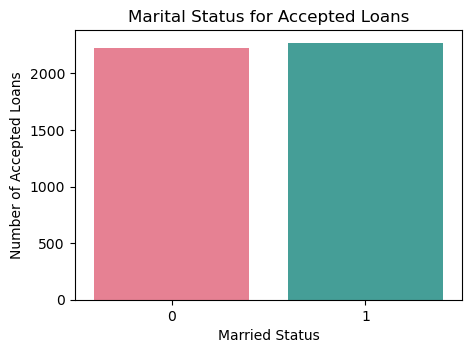

In [26]:
# Filter for accepted loans
accepted_loans = bank_loan_data[bank_loan_data['Loan_Status'] == 1]

# Count of married vs unmarried for accepted loans
married_counts = accepted_loans['Married'].value_counts()

# Bar plot
plt.figure(figsize=(5, 3.5))
sns.barplot(x=married_counts.index, y=married_counts.values, palette='husl')
plt.title('Marital Status for Accepted Loans')
plt.xlabel('Married Status')
plt.ylabel('Number of Accepted Loans')
plt.show()

/var/folders/s5/xxr506r10qlgjnrpg0_ntbqh0000gn/T/ipykernel_20197/3808621077.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=married_counts.index, y=married_counts.values, palette='colorblind')


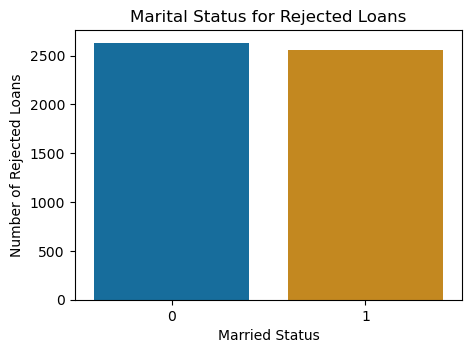

In [27]:
# Filter for accepted loans
rejected_loans = bank_loan_data[bank_loan_data['Loan_Status'] == 0]

# Count of married vs unmarried for accepted loans
married_counts = rejected_loans['Married'].value_counts()

# Bar plot
plt.figure(figsize=(5, 3.5))
sns.barplot(x=married_counts.index, y=married_counts.values, palette='colorblind')
plt.title('Marital Status for Rejected Loans')
plt.xlabel('Married Status')
plt.ylabel('Number of Rejected Loans')
plt.show()

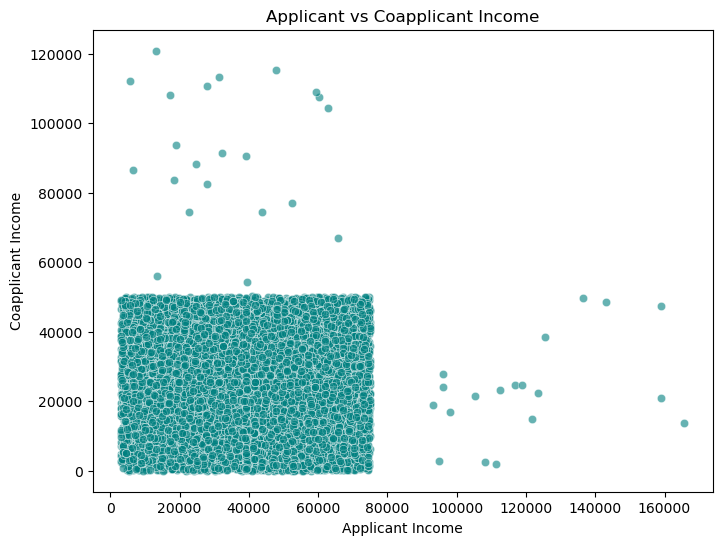

In [28]:
# Scatterplot for the ApplicantIncome and CoapplicantIncome

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=bank_loan_data,
    x='ApplicantIncome',
    y='CoapplicantIncome',
    alpha=0.6,
    color='teal'
)
plt.title('Applicant vs Coapplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.show()

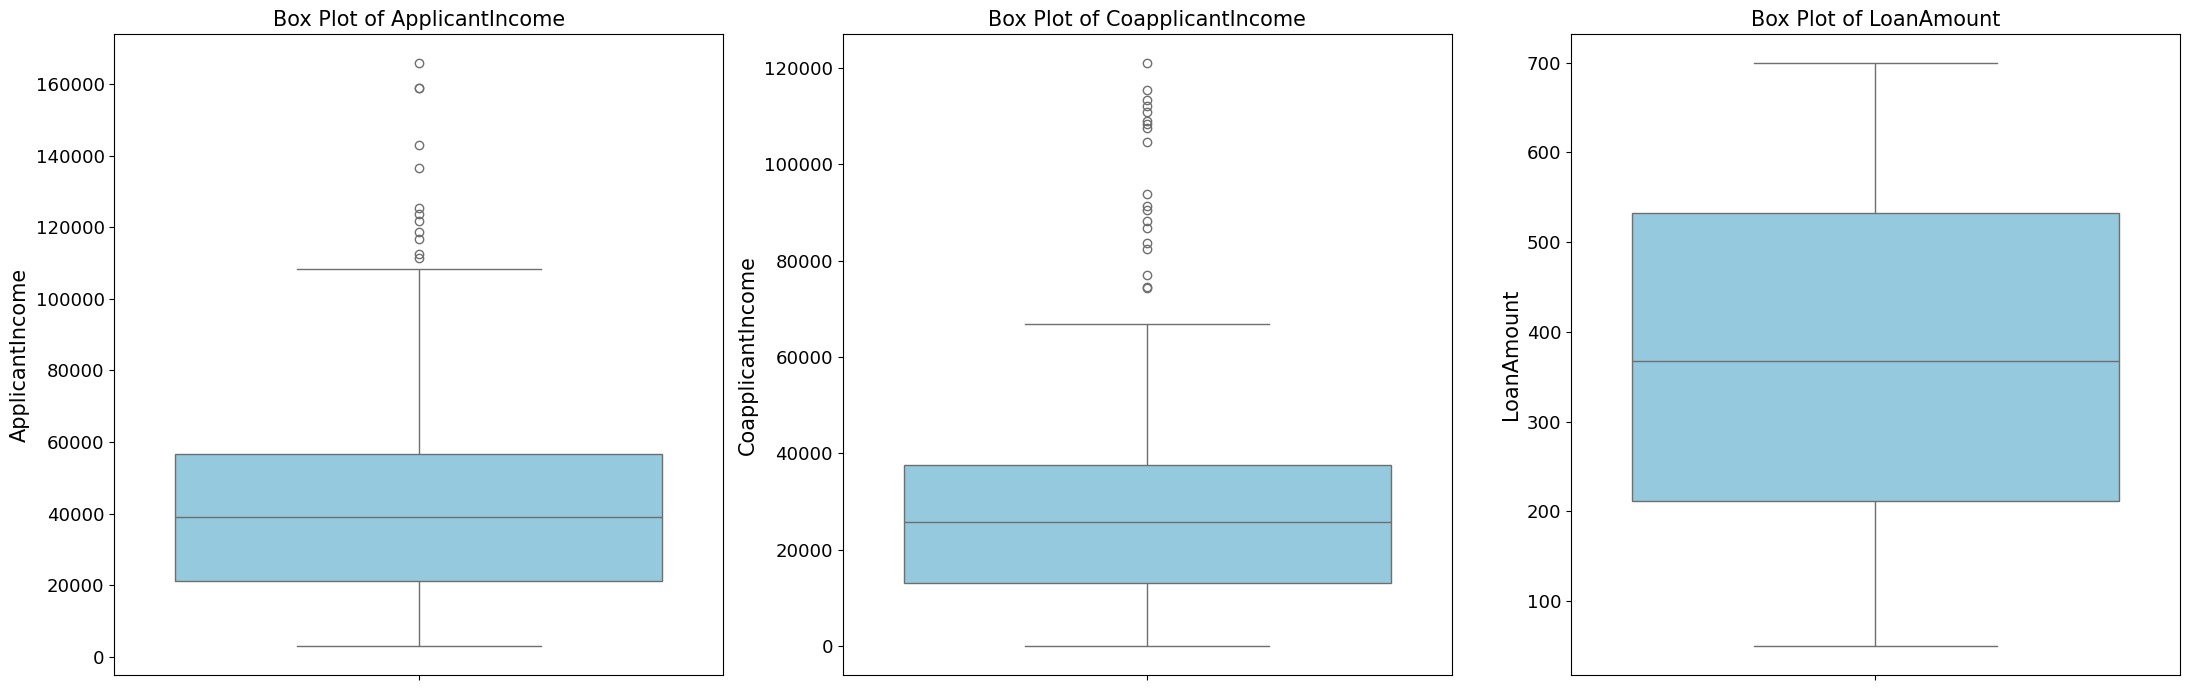

In [29]:
# Box plot for ApplicantIncome, CoapplicantIncome and LoanAmount

# Define the columns to plot
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create box plots
plt.figure(figsize=(22, 7))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=bank_loan_data[col], color='skyblue')
    plt.title(f'Box Plot of {col}', fontsize = 15)
    plt.tick_params(labelsize=13)
    plt.ylabel(col, fontsize=15)
    plt.tight_layout()

plt.show()

### C. Descriptive Analytics

#### Report Summary

In [30]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in columns:
    print(f"\n5-Number Summary for {col}:")
    print(f"Minimum: {bank_loan_data[col].min():,.2f}")
    print(f"Q1 (25th percentile): {bank_loan_data[col].quantile(0.25):,.2f}")
    print(f"Median (50th percentile): {bank_loan_data[col].median():,.2f}")
    print(f"Q3 (75th percentile): {bank_loan_data[col].quantile(0.75):,.2f}")
    print(f"Maximum: {bank_loan_data[col].max():,.2f}")



5-Number Summary for ApplicantIncome:
Minimum: 3,002.00
Q1 (25th percentile): 21,059.00
Median (50th percentile): 39,144.00
Q3 (75th percentile): 56,510.00
Maximum: 165,720.00

5-Number Summary for CoapplicantIncome:
Minimum: 0.00
Q1 (25th percentile): 13,081.00
Median (50th percentile): 25,634.50
Q3 (75th percentile): 37,559.00
Maximum: 120,900.00

5-Number Summary for LoanAmount:
Minimum: 50.00
Q1 (25th percentile): 212.00
Median (50th percentile): 368.00
Q3 (75th percentile): 532.00
Maximum: 699.00


### D. Predictive Analytics

In [31]:
# Define variables

X = bank_loan_data.drop(columns = 'Loan_Status', axis = 1)
y = bank_loan_data['Loan_Status']


In [32]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify = y)

In [33]:
# Scale train dataset

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Balance dataset

In [34]:
# Check imbalance dataset

bank_loan_data['Loan_Status'].value_counts()

Loan_Status
0    5185
1    4488
Name: count, dtype: int64

In [35]:
# Now balance dataset

ROv = RandomOverSampler(random_state = 42)

X_sampled, y_sampled = ROv.fit_resample(X, y)

/var/folders/s5/xxr506r10qlgjnrpg0_ntbqh0000gn/T/ipykernel_20197/842226061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_sampled, palette='Set2')


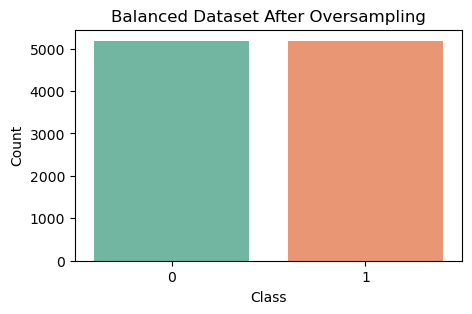

In [36]:
# plot after balancing labels

plt.figure(figsize = (5, 3))
sns.countplot(x=y_sampled, palette='Set2')
plt.title('Balanced Dataset After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Introduce RandomForest model

In [37]:
# Introduce the machine learning model for balanced dataset with hyperparameter tuning

RF_clf = RandomForestClassifier(max_depth = 16, n_estimators=1000, class_weight = 'balanced', random_state=42)
RF_clf.fit(X_sampled, y_sampled)

RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=1000,
                       random_state=42)

In [38]:
# Model Prediction

y_pred1 = RF_clf.predict(X_test)

#### Model evaluation

In [39]:
# Model accuracy

train_accuracy1 = accuracy_score(y_sampled, RF_clf.predict(X_sampled))
test_accuracy1 = accuracy_score(y_test, y_pred1)

print("Train accuracy of the model: {:.1f}%".format(train_accuracy1 * 100))
print("Test accuracy of the model: {:.1f}%".format(test_accuracy1 * 100))

Train accuracy of the model: 98.0%
Test accuracy of the model: 97.7%


In [40]:
# classification report for RF

report1 = classification_report(y_pred1, y_test)
print(report1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1044
           1       0.97      0.98      0.97       891

    accuracy                           0.98      1935
   macro avg       0.98      0.98      0.98      1935
weighted avg       0.98      0.98      0.98      1935



In [41]:
# Model error

error1 = root_mean_squared_error(y_pred1, y_test)
print("Error for Random Forest model: {:.2f}".format(error1))

Error for Random Forest model: 0.15


Text(20.72222222222222, 0.5, 'Actual')

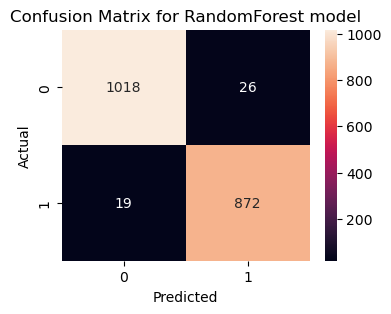

In [42]:
# Build confusion matrix for RandomForest model

CM1 = confusion_matrix(y_pred1, y_test)

plt.figure(figsize = (4, 3))
sns.heatmap(CM1, annot = True, fmt = 'g')
plt.title('Confusion Matrix for RandomForest model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [43]:
CM1 = confusion_matrix(y_test, y_pred1).ravel()

# Extracting the values
TP, FP, TN, FN = CM1

# Creating a dictionary for easy printing
instances = {
    'True positive': TP,
    'False positive': FP,
    'True negative': TN,
    'False negative': FN
}

# Printing the values
for instance, value in instances.items():
    print(f'{instance}: {value}\n')


True positive: 1018

False positive: 19

True negative: 26

False negative: 872



#### Introduce Naive-Bayes Model

In [44]:
NB = GaussianNB()

# Fit the model

NB.fit(X_sampled, y_sampled)

GaussianNB()

In [45]:
# Model prediction

y_pred2 = NB.predict(X_test)

#### Model Evaluation

In [46]:
train_accuracy2 = accuracy_score(y_sampled, NB.predict(X_sampled))
test_accuracy2 = accuracy_score(y_test, y_pred2)

print("Train accuracy of the model: {:.2f}%".format(train_accuracy2 * 100))
print("Test accuracy of the model: {:.2f}%".format(test_accuracy2 * 100))

Train accuracy of the model: 74.47%
Test accuracy of the model: 74.57%


In [47]:
# classification report for NB

report2 = classification_report(y_pred2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1003
           1       0.74      0.72      0.73       932

    accuracy                           0.75      1935
   macro avg       0.75      0.74      0.74      1935
weighted avg       0.75      0.75      0.75      1935



In [48]:
# Model error

error2 = root_mean_squared_error(y_pred2, y_test)
print("Error for Naive_Bayes model: {:.2f}".format(error2))

Error for Naive_Bayes model: 0.50


Text(20.72222222222222, 0.5, 'Actual')

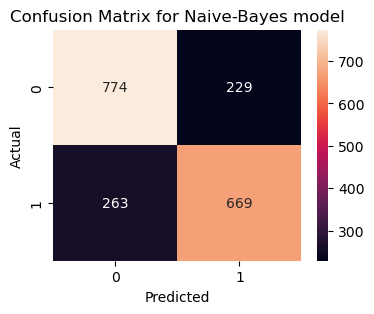

In [49]:
# Build confusion matrix for Naive_Bayes model

CM2 = confusion_matrix(y_pred2, y_test)

plt.figure(figsize = (4, 3))
sns.heatmap(CM2, annot = True, fmt = 'g')
plt.title('Confusion Matrix for Naive-Bayes model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [50]:
CM2 = confusion_matrix(y_test, y_pred2).ravel()

# Extracting the values
TP, FP, TN, FN = CM2

# Creating a dictionary for easy printing
instances = {
    'True positive': TP,
    'False positive': FP,
    'True negative': TN,
    'False negative': FN
}

# Printing the values
for instance, value in instances.items():
    print(f'{instance}: {value}\n')


True positive: 774

False positive: 263

True negative: 229

False negative: 669



### Summary of the two models

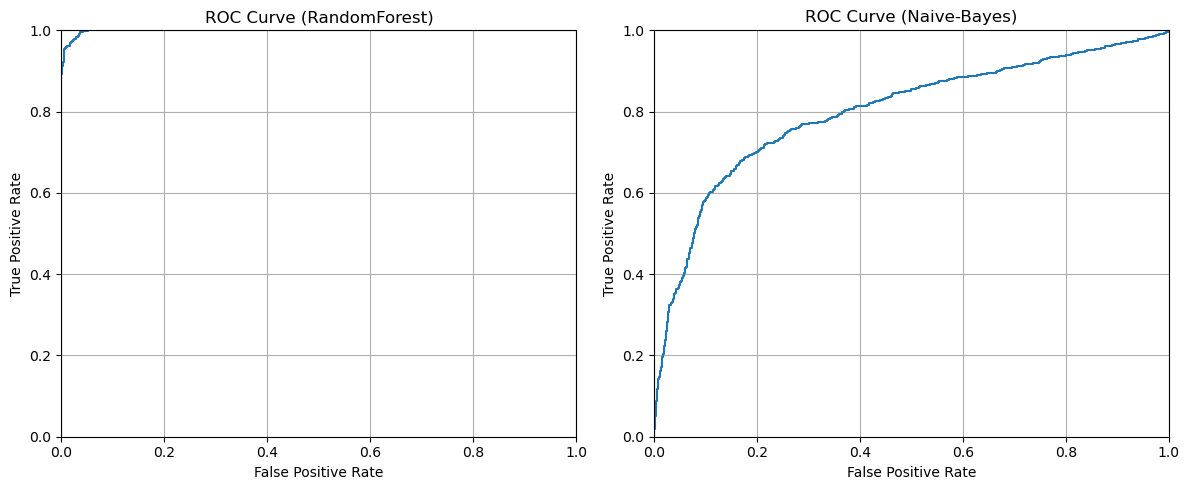

In [53]:
# Define models
models = {
    "RandomForest": RandomForestClassifier(max_depth=16, n_estimators=1000, class_weight='balanced', random_state=42),
    "Naive-Bayes": GaussianNB()
}

# Evaluate each model
results = []
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Use 1 row, 2 cols since you only have 2 models
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    model.fit(X_sampled, y_sampled)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    RMSE = root_mean_squared_error(y_test, y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    axes[i].plot(fpr, tpr)
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.0])
    axes[i].set_title(f'ROC Curve ({name})')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].grid(True)

    # Save metrics
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Root Mean Squared Error': RMSE
    })

plt.tight_layout()
plt.show()


#### Show comparison table

In [54]:
comparison_df = pd.DataFrame(results).set_index('Model')
print("\nModel Performance Comparison:\n")
print(comparison_df.round(3))


Model Performance Comparison:

              Accuracy  Precision  Recall  F1-Score  Root Mean Squared Error
Model                                                                       
RandomForest     0.977      0.979   0.971     0.975                    0.152
Naive-Bayes      0.746      0.718   0.745     0.731                    0.504
